<a href="https://colab.research.google.com/github/komal-1027/data-analysis/blob/main/XGBoost_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dataset.xlsx to dataset.xlsx
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7200 non-null   float64
 1   Sex                        7200 non-null   int64  
 2   On_thyroxine               7200 non-null   int64  
 3   Query_on_thyroxine         7200 non-null   int64  
 4   On_antithyroid_medication  7200 non-null   int64  
 5   Sick                       7200 non-null   int64  
 6   Pregnant                   7200 non-null   int64  
 7   Thyroid_surgery            7200 non-null   int64  
 8   I131_treatment             7200 non-null   int64  
 9   Query_hypothyroid          7200 non-null   int64  
 10  Query_hyperthyroid         7200 non-null   int64  
 11  Lithium                    7200 non-null   int64  
 12  Goitre                     7200 non-null   int64  
 13

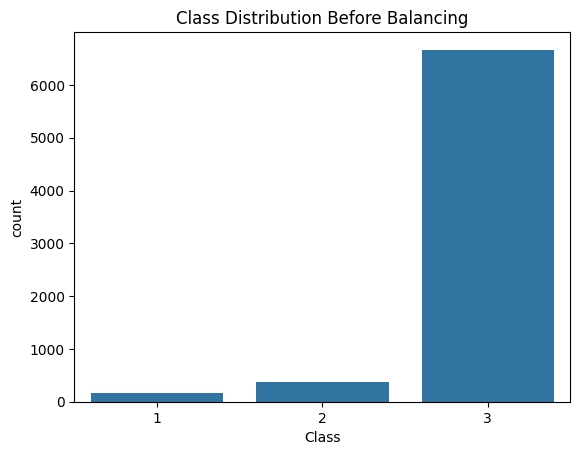

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from google.colab import files
import xgboost as xgb

# Upload and Load dataset
uploaded = files.upload()
data = pd.read_excel("dataset.xlsx")  # Replace with your dataset file

# Display dataset info
print("Dataset Info:")
print(data.info())

# Check class distribution before balancing
print("\nClass Distribution Before Balancing:")
print(data['Class'].value_counts())

# Visualizing imbalance
sns.countplot(x=data['Class'])
plt.title("Class Distribution Before Balancing")
plt.show()

# Define features (X) and target (y)
X = data.drop(columns=['Class'])  # Replace 'Class' with actual target column name
y = data['Class']

# **Feature Selection using XGBoost Feature Importance**
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)
selector = SelectFromModel(xgb_model, prefit=True)
X_selected = selector.transform(X)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features)

# Convert back to DataFrame
X = pd.DataFrame(X_selected, columns=selected_features)

# **Apply Random UnderSampling**
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check class distribution after balancing
print("\nClass Distribution After Balancing:")
print(y_resampled.value_counts())

# Visualizing class distribution after balancing
sns.countplot(x=y_resampled)
plt.title("Class Distribution After Balancing")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot confusion matrix heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

Saving dataset.xlsx to dataset (2).xlsx
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7200 non-null   float64
 1   Sex                        7200 non-null   int64  
 2   On_thyroxine               7200 non-null   int64  
 3   Query_on_thyroxine         7200 non-null   int64  
 4   On_antithyroid_medication  7200 non-null   int64  
 5   Sick                       7200 non-null   int64  
 6   Pregnant                   7200 non-null   int64  
 7   Thyroid_surgery            7200 non-null   int64  
 8   I131_treatment             7200 non-null   int64  
 9   Query_hypothyroid          7200 non-null   int64  
 10  Query_hyperthyroid         7200 non-null   int64  
 11  Lithium                    7200 non-null   int64  
 12  Goitre                     7200 non-null   int64  

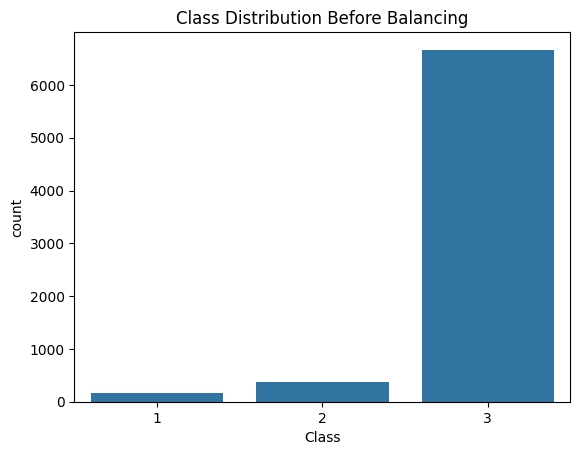

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:02:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Selected Features: Index(['On_thyroxine', 'Thyroid_surgery', 'TSH', 'FTI'], dtype='object')

Class Distribution After Balancing:
0    166
1    166
2    166
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


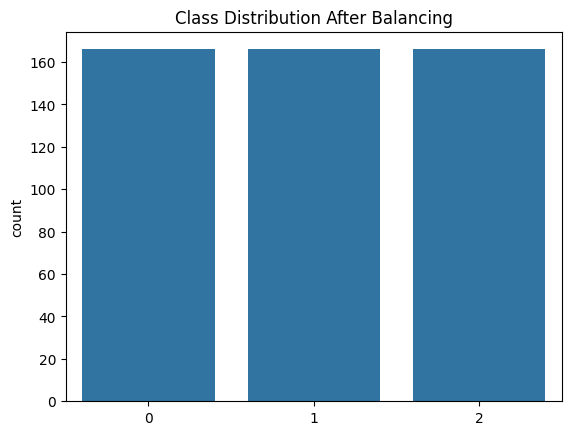


--- Logistic Regression ---
Accuracy: 0.54
Precision: 0.8298630136986301
Recall: 0.54
F1 Score: 0.5245356321839081
Confusion Matrix:
 [[20 18  0]
 [ 0 27  0]
 [ 0 28  7]]


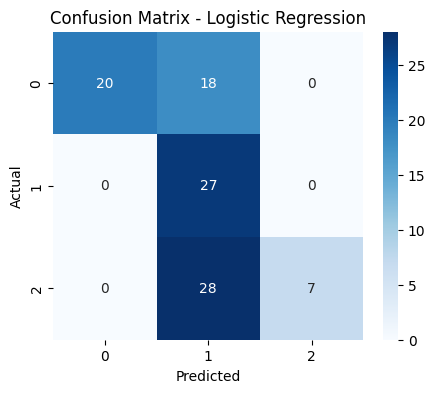


--- Decision Tree ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[38  0  0]
 [ 0 27  0]
 [ 0  0 35]]


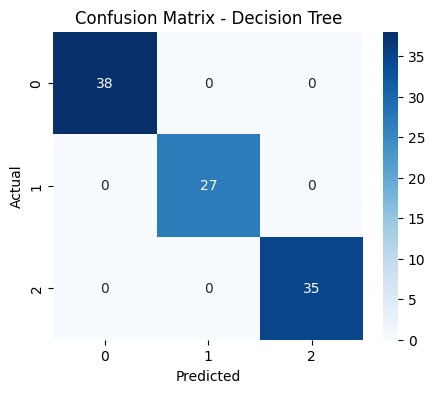


--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[38  0  0]
 [ 0 27  0]
 [ 0  0 35]]


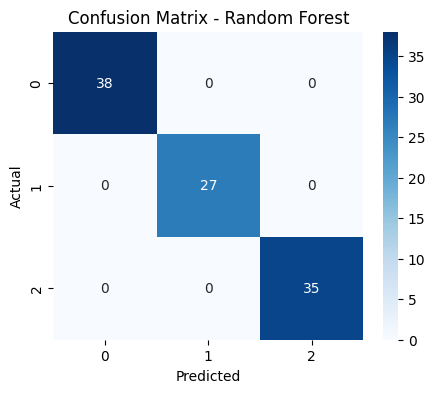


--- SVM ---
Accuracy: 0.7
Precision: 0.8070588235294117
Recall: 0.7
F1 Score: 0.7135780885780886
Confusion Matrix:
 [[28 10  0]
 [ 0 24  3]
 [ 0 17 18]]


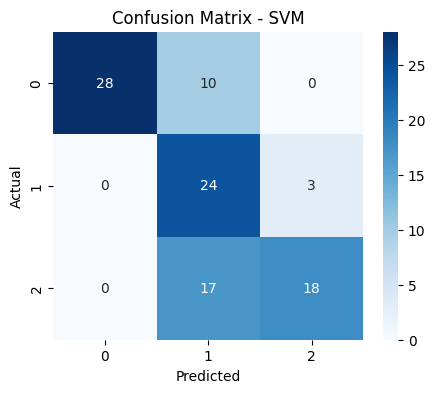

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from google.colab import files
import xgboost as xgb

# Upload and Load dataset
uploaded = files.upload()
data = pd.read_excel("dataset.xlsx")  # Replace with your dataset file

# Display dataset info
print("Dataset Info:")
print(data.info())

# Check class distribution before balancing
print("\nClass Distribution Before Balancing:")
print(data['Class'].value_counts())

# Visualizing imbalance
sns.countplot(x=data['Class'])
plt.title("Class Distribution Before Balancing")
plt.show()

# Define features (X) and target (y)
X = data.drop(columns=['Class'])  # Replace 'Class' with actual target column name
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['Class'])

# **Feature Selection using XGBoost Feature Importance**
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)
selector = SelectFromModel(xgb_model, prefit=True)
X_selected = selector.transform(X)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features)

# Convert back to DataFrame
X = pd.DataFrame(X_selected, columns=selected_features)

# **Apply Random UnderSampling**
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check class distribution after balancing
print("\nClass Distribution After Balancing:")
print(pd.Series(y_resampled).value_counts())

# Visualizing class distribution after balancing
sns.countplot(x=y_resampled)
plt.title("Class Distribution After Balancing")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot confusion matrix heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
